### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.11.0'

### Loading the dataset

- Dataset: https://keras.io/api/datasets/mnist/

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0]

5

### Visualizing the images

In [8]:
np.random.randint(0, 59999)

15574

7


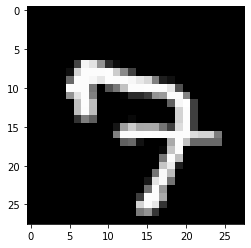

In [9]:
i = np.random.randint(0, 59999)
print(y_train[i])
plt.imshow (x_train[i], cmap='gray');

In [10]:
np.arange(0, 100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

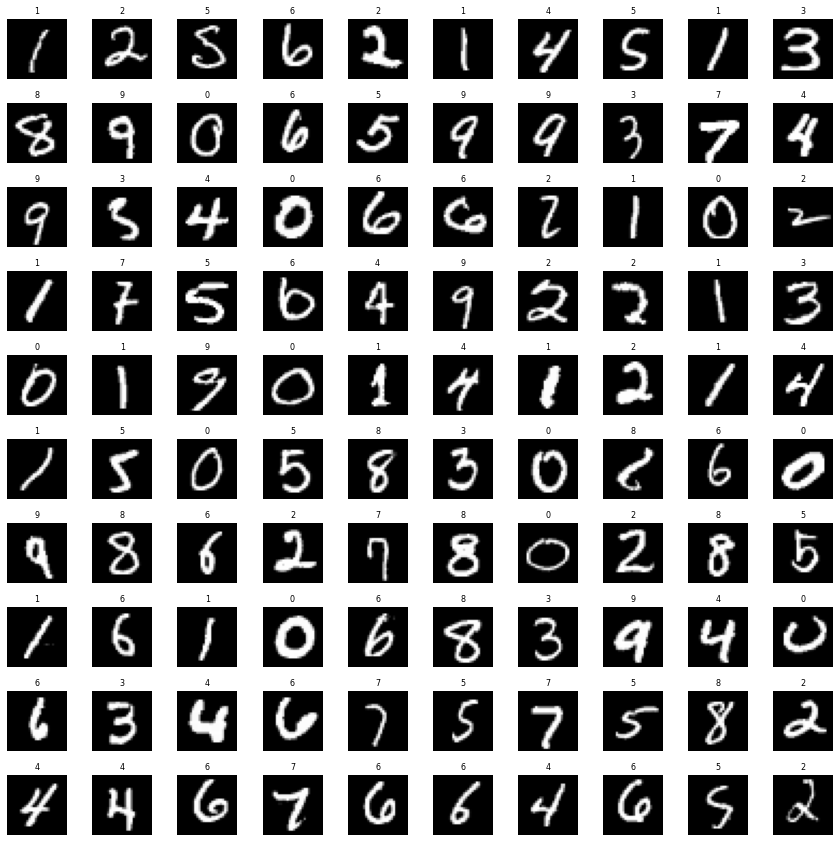

In [11]:

width = 10
height = 10
fig, axes = plt.subplots (height, width, figsize=(15, 15))
#print (axes.shape)
axes = axes.ravel() #-> (10,10) -> [100]
#print(axes.shape)
for i in np.arange(0, width * height):
    index = np.random.randint(0, 59999)
    axes[i].imshow (x_train [index], cmap = 'gray')
    axes[i].set_title(y_train [index], fontsize = 8)
    axes[i].axis ('off')
plt.subplots_adjust(hspace=0.4)

### Pre-processing the images

In [12]:
x_train [0].min(), x_train[0].max()

(0, 255)

In [13]:
x_train = x_train / 255
x_test = x_test / 255

In [14]:
x_train [0].min(), x_train [0].max()

(0.0, 1.0)

In [15]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [16]:
x_train.shape [0], x_train.shape [1], x_train.shape [2]

(60000, 28, 28)

In [17]:
x_train = x_train.reshape (x_train.shape [0], x_train.shape [1] * x_train.shape [2])
x_train.shape


(60000, 784)

In [18]:
x_test = x_test.reshape (x_test.shape [0], x_test.shape [1] * x_test.shape [2])
x_test.shape

(10000, 784)

### Building and training the autoencoder

In [19]:
# 784 - 128 - 64 - 32 - 64 - 128 - 784

In [20]:
autoencoder = Sequential()
# Encode
autoencoder.add(Dense(units = 128, activation='relu', input_dim = 784))
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 32, activation='relu')) # Encoded image
# Decode
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 128, activation='relu'))
autoencoder.add(Dense(units = 784, activation='sigmoid'))

In [21]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [22]:
autoencoder.compile (optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [23]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [24]:
autoencoder.fit(x_train, x_train, epochs =50)

Epoch 1/50
1875/1875 [==============================] - 6s 2ms/step - loss: 0.1557 - accuracy: 0.0115
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1131 - accuracy: 0.0117
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1050 - accuracy: 0.0110
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1012 - accuracy: 0.0117
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0987 - accuracy: 0.0122
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0965 - accuracy: 0.0125
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0947 - accuracy: 0.0131
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0935 - accuracy: 0.0136
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0924 - accuracy: 0.0137
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.091

### Encoding the images

In [25]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [26]:
autoencoder.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_input')>

In [27]:
autoencoder.get_layer('dense_2').output

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_2')>

In [28]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('dense_2').output)

In [29]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


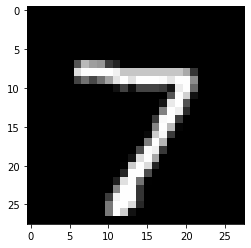

In [30]:
plt.imshow(x_test[0].reshape(28,28), cmap = 'gray');

In [31]:
x_test[0].shape

(784,)

In [32]:
x_test[0].reshape(1, -1).shape

(1, 784)

In [33]:
encoded_image = encoder.predict(x_test[0].reshape(1, -1))

1/1 [==============================] - 0s 110ms/step


In [34]:
encoded_image, encoded_image.shape

(array([[ 3.4353504 ,  0.        ,  0.        ,  3.1493108 ,  3.8671155 ,
          0.        ,  0.65456325,  5.2055426 ,  7.5163903 ,  0.        ,
          6.419434  ,  5.7942348 ,  5.3805637 ,  6.8187923 ,  4.485435  ,
          1.4701949 ,  4.41831   ,  3.3859887 ,  3.0330772 , 10.718823  ,
          0.        ,  4.7410173 ,  4.197806  ,  0.        ,  6.2736325 ,
          0.        ,  4.0179715 ,  0.        ,  1.6786326 ,  3.370073  ,
         10.272646  ,  3.0032713 ]], dtype=float32),
 (1, 32))

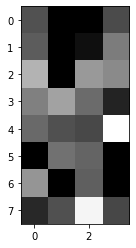

In [35]:
plt.imshow(encoded_image.reshape(8, 4), cmap = 'gray');

### Decoding the images

In [36]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [37]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
decoder = Model(inputs = input_layer_decoder, outputs =decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [38]:
decoded_image = decoder.predict(encoded_image)

1/1 [==============================] - 0s 70ms/step


In [39]:
decoded_image.shape

(1, 784)

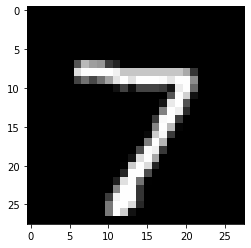

In [40]:
plt.imshow(x_test[0].reshape(28,28), cmap ='gray');

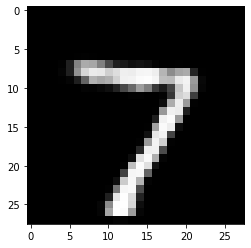

In [41]:
plt.imshow(decoded_image.reshape(28,28), cmap = 'gray');

### Encoding and decoding the test images

In [42]:
x_test.shape[0]

10000

1/1 [==============================] - 0s 22ms/step


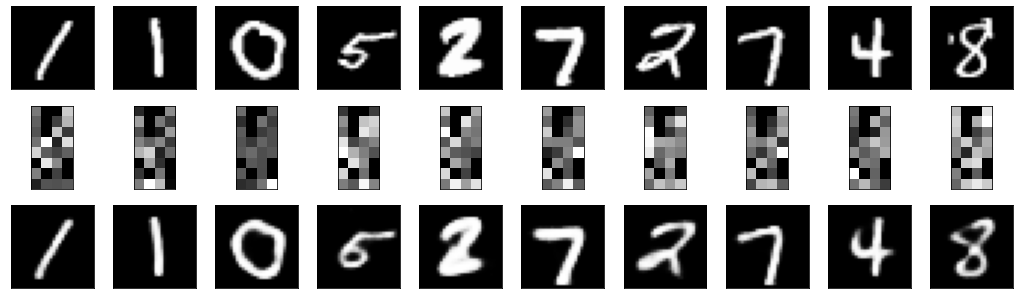

In [43]:
n_images = 10 
test_images = np.random.randint(0,x_test.shape[0] -1, size = n_images)
plt.figure(figsize=(18,18)) 
for i, image_index in enumerate(test_images):
    ax = plt.subplot(10, 10, i + 1)
    plt.imshow(x_test[image_index].reshape(28, 28), cmap = 'gray') 
    plt.xticks(()) 
    plt.yticks(())
    
    ax = plt.subplot(10, 10, i + 1 + n_images) 
    encoded_image = encoder.predict(x_test[image_index].reshape(1, -1))
    plt.imshow(encoded_image.reshape(8, 4), cmap = 'gray') 
    plt.xticks(()) 
    plt.yticks(())
    
    
    ax = plt.subplot(10, 10, i + 1 + n_images*2) 
    plt.imshow(decoder.predict(encoded_image).reshape(28, 28), cmap = 'gray') 
    plt.xticks(()) 
    plt.yticks(())